In [368]:
%reset -f

In [369]:
import re
import os
import itertools
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# %matplotlib inline

In [829]:
class fileProcess:
    def __init__(self,bikeType,yawAngle,lineType):
        '''
        Input-Amplitude values, Flow type, omega values and parameter type 
        Functions-accessData, cleanData, getData
        Details-Has functions related to browsing folders and accessing data
        '''
        self.bikeType = str(bikeType)
        self.yawAngle = str(yawAngle)    
        self.lineType = str(lineType)
        fileProcess.yawAngle = float(self.yawAngle[1:])
        
    def accessFile(self):
        '''
        Input-As in class fileProcess
        OutPut-Files in the paraType and corresponding folder path
        Details-time is normalized with time period of bodies oscillation, 
        '''
        path = os.path.abspath('.')
        targetList = [self.bikeType,self.yawAngle,'postProcessing/graphs/500']
        filePath = os.path.join(path,self.bikeType,self.yawAngle,'postProcessing/graphs/500')
        fList = os.walk(filePath).next()[2]
        for i in range(len(fList)):
            if (fList[i][4] == self.lineType):
                fileName = fList[i]
        del path, targetList
        return[filePath,fileName]     
  
    def getData(self):
        '''
        Input-As in class fileProcess
        OutPut-Path and name of file, data from file 
        Details-x and y are arrays
        '''
        [path,file] = fileProcess.accessFile(self)
        data = np.loadtxt(os.path.join(path,file))
        x = np.round(data[:,0],decimals=5, out=None)
        y = np.zeros(shape=(len(data),len(data[0,1:])), dtype=float, order='C')
        z = np.zeros(shape=(x.shape), dtype=float, order='C')
        for j in range(1,len(data[0,1:])+1):
            y[:,j-1] = data[:,j]
        for i in range(0,len(y)-2):
            z[i] = np.sqrt(np.sum(np.power(y[i],2)))
        return[np.array(x),np.array(z)]

In [830]:
class results:
    def __init__(self,x,y,veloWind,veloBike):
        '''
        Input-Amplitude values, Flow type, omega values and parameter type 
        Functions-accessData, cleanData, getData
        Details-Has functions related to browsing folders and accessing data
        '''
        self.x = np.array(x)
        self.y = np.array(y)
        self.veloWind = float(veloWind)
        self.veloBike = float(veloBike)
        
    def getRelVelo(self):
        relVelo1 = self.veloBike-(self.veloWind*np.cos(np.deg2rad(fileProcess.yawAngle)))
        relVelo2 = self.veloWind*np.sin(np.deg2rad(fileProcess.yawAngle))
        relVelo = np.sqrt(np.square(relVelo1)+np.square(relVelo2))
        return[float(relVelo1)]
    
    def nonDim(self):
        [v] = results.getRelVelo(self)
        y = np.zeros(shape=(self.y.shape),dtype=float, order='C')  
        y = self.y/v      
        return[np.array(y)]

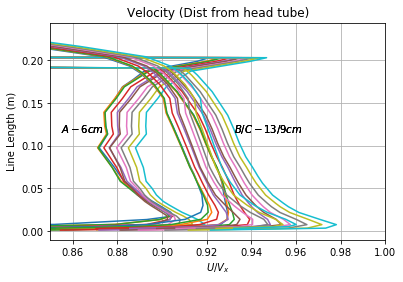

In [831]:
def main():
    line = ['A','B','C']
    yAngle = ['Y0','Y5','Y10','Y15','Y20','Y25','Y30','Y35','Y40','Y45']
    for j in range(len(line)):
        for i in range(len(yAngle)):
            data = fileProcess(bikeType='falcon',yawAngle=yAngle[i],lineType=line[j])
            [x,y] = fileProcess.getData(data)
            data = None
            data = results(x=x,y=y,veloWind=2,veloBike=9.91)
            [y] = results.nonDim(data)
            plt.figure(10)
#             plt.legend(loc=1)
            plt.plot(y,x,label=yAngle[i][1:]+r'$^O$')
        plt.grid(True)
        plt.xlim(0.85,1)
        plt.xlabel(r'$U/V_x$')
        plt.ylabel('Line Length (m)')
        plt.title('Velocity (Dist from head tube)')
        plt.figtext(0.15, 0.5, '$A-6cm$')
        plt.figtext(0.55, 0.5, '$B/C-13/9cm$')
        plt.savefig('Velo All.jpg',figsize=(4,4),dpi=600) 
       

if __name__ == "__main__":
    main()